<a href="https://colab.research.google.com/github/dgalian/FTW_B7/blob/main/Capstone/Capstone_MBA_Diagnosis_(no_filter).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using Market Basket Analysis to determine the typical combinations of ICD Categories per Claim**

# Import libraries and load dataset

In [ ]:
# Importing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load claims breakdown by diagnosis
clm_icd = pd.read_csv('/content/CLM Breakdown csv.csv')

In [ ]:
# Load ICD table to get ICD category
icd_table = pd.read_excel('/content/icd_table.xlsx')

# Data Prep
Profiling, Cleaning

In [ ]:
clm_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382438 entries, 0 to 382437
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cbdcode        382438 non-null  int64  
 1   claimcode      382438 non-null  int64  
 2   icdno          382438 non-null  int64  
 3   doctorcode     382438 non-null  int64  
 4   cptno          382438 non-null  int64  
 5   sacode         382438 non-null  int64  
 6   UNIT AMT       382438 non-null  float64
 7   QTY            382438 non-null  float64
 8   INCURRED AMT   382438 non-null  float64
 9   HOSP BILL AMT  382438 non-null  float64
 10  COVERED AMT    382438 non-null  float64
 11  BILL TO        382438 non-null  object 
dtypes: float64(5), int64(6), object(1)
memory usage: 35.0+ MB


In [ ]:
# Check number of claims
clm_icd['claimcode'].nunique()

166993

In [ ]:
icd_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   icdno        4343 non-null   int64 
 1   icdcategory  4343 non-null   int64 
 2   icdgroup     4343 non-null   int64 
 3   ICD CODE     4343 non-null   object
 4   ICD DISEASE  4343 non-null   object
dtypes: int64(3), object(2)
memory usage: 169.8+ KB


In [ ]:
# Creating basket of claims by merging claims table and icd category table
claims = pd.merge(clm_icd, icd_table, on='icdno', how='left')

In [ ]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382438 entries, 0 to 382437
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cbdcode        382438 non-null  int64  
 1   claimcode      382438 non-null  int64  
 2   icdno          382438 non-null  int64  
 3   doctorcode     382438 non-null  int64  
 4   cptno          382438 non-null  int64  
 5   sacode         382438 non-null  int64  
 6   UNIT AMT       382438 non-null  float64
 7   QTY            382438 non-null  float64
 8   INCURRED AMT   382438 non-null  float64
 9   HOSP BILL AMT  382438 non-null  float64
 10  COVERED AMT    382438 non-null  float64
 11  BILL TO        382438 non-null  object 
 12  icdcategory    382355 non-null  float64
 13  icdgroup       382355 non-null  float64
 14  ICD CODE       382355 non-null  object 
 15  ICD DISEASE    382355 non-null  object 
dtypes: float64(7), int64(6), object(3)
memory usage: 49.6+ MB


In [ ]:
claims.isnull().sum()

cbdcode           0
claimcode         0
icdno             0
doctorcode        0
cptno             0
sacode            0
UNIT AMT          0
QTY               0
INCURRED AMT      0
HOSP BILL AMT     0
COVERED AMT       0
BILL TO           0
icdcategory      83
icdgroup         83
ICD CODE         83
ICD DISEASE      83
dtype: int64

In [ ]:
null_icd = claims[claims['icdcategory'].isnull()]
null_icd['claimcode'].nunique()

46

**46 claims do not have an ICD category**

In [ ]:
# Drop null values
claims = claims.dropna()
claims.isnull().sum()

cbdcode          0
claimcode        0
icdno            0
doctorcode       0
cptno            0
sacode           0
UNIT AMT         0
QTY              0
INCURRED AMT     0
HOSP BILL AMT    0
COVERED AMT      0
BILL TO          0
icdcategory      0
icdgroup         0
ICD CODE         0
ICD DISEASE      0
dtype: int64

In [ ]:
# Convert Claim code and ICD Category into categorical data
claims['claimcode'] = claims['claimcode'].astype(str)
claims['icdcategory'] = claims['icdcategory'].astype(int).astype(str)
claims['sacode'] = claims['sacode'].astype(int).astype(str)

In [ ]:
# Drop other columns
claims = claims[['claimcode','icdno','icdcategory','ICD CODE','ICD DISEASE','sacode']]
claims.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode
0,203746,6127,84,G90.0,Idiopathic peripheral autonomic neuropathy,3718
1,203913,40054,261,W55,Contact with other mammals,3747
2,203913,40054,261,W55,Contact with other mammals,3750
3,203913,40054,261,W55,Contact with other mammals,3953
4,203913,40054,261,W55,Contact with other mammals,3954


In [ ]:
# Check claim with duplicate ICD category 
claims[claims['claimcode']=='203913']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode
1,203913,40054,261,W55,Contact with other mammals,3747
2,203913,40054,261,W55,Contact with other mammals,3750
3,203913,40054,261,W55,Contact with other mammals,3953
4,203913,40054,261,W55,Contact with other mammals,3954
5,203913,40054,261,W55,Contact with other mammals,3843
6,203913,40054,261,W55,Contact with other mammals,3726


In [ ]:
# Check number of unique ICD categories in claims
claims['icdcategory'].nunique()

241

In [ ]:
241/290

0.8310344827586207

**241 out of 290 or 83% of ICD categories are present in the claims.**

In [ ]:
# Removing duplicate ICD categories in claims, since we are only looking at the occurance of the ICD category per claim
claims['claims_icd'] = claims[['claimcode', 'icdcategory']].agg('_'.join, axis=1)
claims_icd = claims.drop_duplicates(subset='claims_icd')

In [ ]:
claims['icdcategory'].nunique()

241

In [ ]:
claims_icd[claims_icd['icdcategory']=='0']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd
120,208601,77693,0,A09.1,AGE WITH MOD./MARKED DHN,3812,208601_0
723,212928,77693,0,A09.1,AGE WITH MOD./MARKED DHN,3747,212928_0
1068,213902,77689,0,1,LACK OF DOCUMENTS,3718,213902_0
1358,214385,77771,0,I10.0,HPN STAGE I,3718,214385_0
1516,214739,77695,0,A09.3,AGE WITH NO SIGNS OF DHN,3747,214739_0
...,...,...,...,...,...,...,...
382205,602217,77782,0,U07.1,"COVID-19, virus identified",3718,602217_0
382208,602620,77771,0,I10.0,HPN STAGE I,3816,602620_0
382233,607092,77782,0,U07.1,"COVID-19, virus identified",3747,607092_0
382308,616034,77771,0,I10.0,HPN STAGE I,3718,616034_0


In [ ]:
# Dropping ICD Category 0
claims_icd = claims_icd[claims_icd.icdcategory != '0']
claims_icd[claims_icd['icdcategory']=='0']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd


In [ ]:
# Checking number of ICD categories per claim
claims_icd['claimcode'].value_counts().sort_values(ascending=False)

305146    10
309069    10
328555    10
355547     9
377387     9
          ..
453359     1
453361     1
453363     1
453376     1
658022     1
Name: claimcode, Length: 161973, dtype: int64

In [ ]:
claims_icd[claims_icd['claimcode']=='328555']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd
201183,328555,12785,130,K76.0,"Fatty (change of) liver, not elsewhere classified",3807,328555_130
201184,328555,46010,158,M81.9,"Osteoporosis, unspecified",3803,328555_158
201186,328555,25106,216,R80.9,"Proteinuria, unspecified",3808,328555_216
201188,328555,3857,54,E11,Type 2 diabetes mellitus,3803,328555_54
201189,328555,14648,144,M06.9,"Rheumatoid arthritis, unspecified",3800,328555_144
201190,328555,4467,61,E87.8,Other disorders of electrolyte and fluid balan...,3803,328555_61
201191,328555,3639,53,E03.9,"Hypothyroidism, unspecified",3806,328555_53
201192,328555,20895,167,N20.9,"Urinary calculus, unspecified",3978,328555_167
201193,328555,10140,105,I25.1,Atherosclerotic heart disease of native corona...,3853,328555_105
201195,328555,10341,107,I49.9,"Cardiac arrhythmia, unspecified",3816,328555_107


In [ ]:
# Considering only claims with 2 or more ICD categories
claims_icdcombo = claims_icd.groupby('claimcode').filter(lambda x : x['claimcode'].shape[0]>1)
claims_icdcombo['claimcode'].value_counts().sum()

37304

In [ ]:
claims_icdcombo.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd
7815,220945,11745,113,J18.9,"Pneumonia, unspecified organism",1196,220945_113
7822,220945,21009,169,N39.0,"Urinary tract infection, site not specified",3812,220945_169
7828,220946,76619,104,I10.9,Essential Hypertension; malignant hypertension,3952,220946_104
7829,220946,3857,54,E11,Type 2 diabetes mellitus,4020,220946_54
7831,220946,11745,113,J18.9,"Pneumonia, unspecified organism",3712,220946_113


In [ ]:
37304/166993

0.22338660901953974

**37,304 out of 166,993 or 22% of the claims has 2 or more ICD categories.**

## Preparing Transaction List

In [ ]:
# Load ICD table to get ICD category
icd_desc = pd.read_csv('/content/icd_category_categorydes.csv')

# Convert icdcategory  into categorical data
icd_desc['icdcategory'] = icd_desc['icdcategory'].astype(int).astype(str)

# Merge the claims breakdown and idc category description table
claims_icdcombo = pd.merge(claims_icdcombo, icd_desc, on='icdcategory', how='left')
claims_icdcombo.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd,ICD CATEGORY
0,220945,11745,113,J18.9,"Pneumonia, unspecified organism",1196,220945_113,Influenza and pneumonia (J09-J18)
1,220945,21009,169,N39.0,"Urinary tract infection, site not specified",3812,220945_169,Other diseases of the urinary system (N30-N39)
2,220946,76619,104,I10.9,Essential Hypertension; malignant hypertension,3952,220946_104,Hypertensive diseases (I10-I15)
3,220946,3857,54,E11,Type 2 diabetes mellitus,4020,220946_54,Diabetes mellitus (E08-E13)
4,220946,11745,113,J18.9,"Pneumonia, unspecified organism",3712,220946_113,Influenza and pneumonia (J09-J18)


In [ ]:
# Get list ICD Categories by Claim number
transactions = claims_icdcombo.groupby('claimcode').agg(lambda col: ','.join(col)).reset_index()
transactions

/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,claimcode,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd,ICD CATEGORY
0,220945,"113,169","J18.9,N39.0","Pneumonia, unspecified organism,Urinary tract ...","1196,3812","220945_113,220945_169","Influenza and pneumonia (J09-J18),Other diseas..."
1,220946,"104,54,113","I10.9,E11,J18.9",Essential Hypertension; malignant hypertension...,"3952,4020,3712","220946_104,220946_54,220946_113","Hypertensive diseases (I10-I15),Diabetes melli..."
2,230470,"53,54,105","E03.9,E11,I25.0","Hypothyroidism, unspecified,Type 2 diabetes me...","3806,3808,3979","230470_53,230470_54,230470_105","Disorders of thyroid gland (E00-E07),Diabetes ..."
3,232051,"169,53,104","N39.0,E05.9,I11.9","Urinary tract infection, site not specified,Th...","3812,3806,3816","232051_169,232051_53,232051_104",Other diseases of the urinary system (N30-N39)...
4,251715,"54,104","E11,I10.9","Type 2 diabetes mellitus,Essential Hypertensio...","3803,3821","251715_54,251715_104","Diabetes mellitus (E08-E13),Hypertensive disea..."
...,...,...,...,...,...,...,...
13873,580467,"105,21,61,54,53","I25.1,B96.81,E79.0,E11,E05.9",Atherosclerotic heart disease of native corona...,"3979,3802,3803,3812,3806","580467_105,580467_21,580467_61,580467_54,58046...","Ischemic heart diseases (I20-I25),Bacterial an..."
13874,593052,"104,108,169","I10.9,I67.8,N39.0",Essential Hypertension; malignant hypertension...,"3952,3952,3812","593052_104,593052_108,593052_169","Hypertensive diseases (I10-I15),Cerebrovascula..."
13875,602620,"170,168,53,61","N40,N28.9,E07.9,E79.0","Enlarged prostate,Disorder of kidney and urete...","3801,3978,3806,3803","602620_170,602620_168,602620_53,602620_61","Diseases of male genital organs (N40-N53),Othe..."
13876,602892,"170,61","N42.9,E78.5","Disorder of prostate, unspecified,Hyperlipidem...","3801,3807","602892_170,602892_61","Diseases of male genital organs (N40-N53),Meta..."


In [ ]:
transactions[transactions['icdcategory'] == '54,105']['claimcode'].count()

27

In [ ]:
27/13878

0.0019455252918287938

In [ ]:
transactions['icd'] = transactions['icdcategory'].apply(lambda t: t.split(','))
transactions = transactions['icd']
transactions.head()

0        [113, 169]
1    [104, 54, 113]
2     [53, 54, 105]
3    [169, 53, 104]
4         [54, 104]
Name: icd, dtype: object

In [ ]:
transaction_list = list(transactions)
transaction_list[:5]

[['113', '169'],
 ['104', '54', '113'],
 ['53', '54', '105'],
 ['169', '53', '104'],
 ['54', '104']]

## One Hot Encoding

In [ ]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transaction_list)

# One-hot encode transactions
onehot = encoder.transform(transaction_list)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,1,10,100,102,103,104,105,106,107,108,...,87,88,89,90,91,93,95,97,98,99
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13873,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13874,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
13875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# MBA - Diagnosis that are claimed together

## EDA of combination length

In [ ]:
# Choose max_len
claims_icdcombo['claimcode'].value_counts().describe()

count    13878.000000
mean         2.687995
std          1.018211
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: claimcode, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Claims')

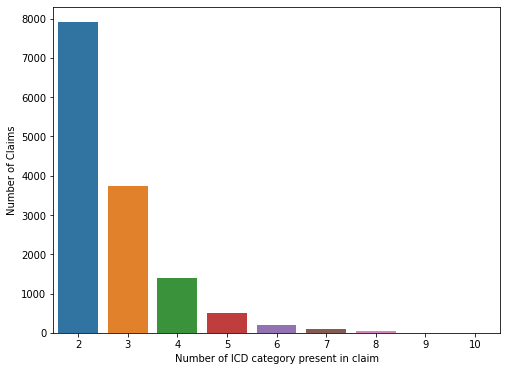

In [ ]:
icd_count = pd.DataFrame(claims_icdcombo['claimcode'].value_counts())
plt.figure(figsize=(8,6))
ax = sns.countplot('claimcode', data=icd_count)
ax.set_xlabel('Number of ICD category present in claim')
ax.set_ylabel('Number of Claims')

Text(0, 0.5, 'Number of ICD category present in claim')

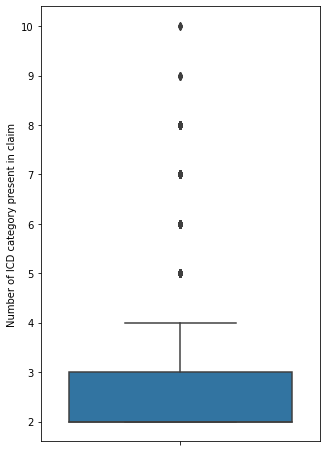

In [ ]:
plt.figure(figsize=(5,8))
ax = sns.boxplot(y='claimcode', data=icd_count)
ax.set_ylabel('Number of ICD category present in claim')

We will choose max length of 4.

##Frequent Itemsets (Apriori)

In [ ]:
from mlxtend.frequent_patterns import apriori

# Getting all combinations of item sets
frequent_itemsets = apriori(onehot, 
                            min_support = 0.000000000000001,
                            max_len = 4, 
                            use_colnames = True).sort_values('support',ascending=False)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
147,0.428376,(61),1
5,0.408632,(104),1
141,0.236922,(54),1
142,0.225897,(55),1
393,0.153480,"(104, 61)",2
...,...,...,...
6351,0.000072,"(170, 53, 151)",3
6352,0.000072,"(170, 54, 151)",3
6353,0.000072,"(170, 61, 151)",3
6354,0.000072,"(171, 218, 151)",3


In [ ]:
frequent_itemsets[frequent_itemsets['itemsets']=={'54','105'}]

,support,itemsets,length
482,0.020752,"(54, 105)",2


**Min support is 0 for frequent_itemsets**

## Zhang's rule

In [ ]:
# Define a new zhang's metric function
def zhangs_rule(rules):
	PAB = rules['support'].copy()
	PA = rules['antecedent support'].copy()
	PB = rules['consequent support'].copy()
	NUMERATOR = PAB - PA*PB
	DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
	return NUMERATOR / DENOMINATOR

##Association Rule

In [ ]:
# Recover association rules
from mlxtend.frequent_patterns import association_rules

rules_5 = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.01) #0.000000000000001)
rules_5['zhang'] = zhangs_rule(rules_5)

# Print remaining rule
rules_5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,(104),(61),0.408632,0.428376,0.153480,0.375595,0.876789,-0.021568,0.915470,-0.192003
1,(61),(104),0.428376,0.408632,0.153480,0.358284,0.876789,-0.021568,0.921541,-0.197326
2,(104),(55),0.408632,0.225897,0.121127,0.296420,1.312192,0.028818,1.100235,0.402316
3,(55),(104),0.225897,0.408632,0.121127,0.536204,1.312192,0.028818,1.275060,0.307345
4,(54),(61),0.236922,0.428376,0.109310,0.461375,1.077032,0.007818,1.061265,0.093729
...,...,...,...,...,...,...,...,...,...,...
205,(169),(53),0.128116,0.149661,0.010520,0.082115,0.548670,-0.008654,0.926411,-0.485454
206,(54),(131),0.236922,0.060527,0.010448,0.044100,0.728591,-0.003892,0.982814,-0.328034
207,(131),(54),0.060527,0.236922,0.010448,0.172619,0.728591,-0.003892,0.922282,-0.283930
208,(171),(61),0.027165,0.428376,0.010304,0.379310,0.885462,-0.001333,0.920950,-0.117361


# Dictionary for Tableau

## Prep Association Rules

**Combine antecedent and consequent**

In [ ]:
# Initialize
rules_5['combination']=0
add = []

# Combine antecedent and consequent by row
for i in range(len(rules_5)):
     rules_5['combination'].iloc[i] = frozenset.union(rules_5['antecedents'][i],rules_5['consequents'][i])
add.append(rules_5)

rules_5

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang,combination
0,(104),(61),0.408632,0.428376,0.153480,0.375595,0.876789,-0.021568,0.915470,-0.192003,"(104, 61)"
1,(61),(104),0.428376,0.408632,0.153480,0.358284,0.876789,-0.021568,0.921541,-0.197326,"(104, 61)"
2,(104),(55),0.408632,0.225897,0.121127,0.296420,1.312192,0.028818,1.100235,0.402316,"(104, 55)"
3,(55),(104),0.225897,0.408632,0.121127,0.536204,1.312192,0.028818,1.275060,0.307345,"(104, 55)"
4,(54),(61),0.236922,0.428376,0.109310,0.461375,1.077032,0.007818,1.061265,0.093729,"(54, 61)"
...,...,...,...,...,...,...,...,...,...,...,...
205,(169),(53),0.128116,0.149661,0.010520,0.082115,0.548670,-0.008654,0.926411,-0.485454,"(53, 169)"
206,(54),(131),0.236922,0.060527,0.010448,0.044100,0.728591,-0.003892,0.982814,-0.328034,"(54, 131)"
207,(131),(54),0.060527,0.236922,0.010448,0.172619,0.728591,-0.003892,0.922282,-0.283930,"(54, 131)"
208,(171),(61),0.027165,0.428376,0.010304,0.379310,0.885462,-0.001333,0.920950,-0.117361,"(171, 61)"


**Get aggregate metrics of each unique combination**

In [ ]:
# Get average metric of each unique combination
dict_unique = rules_5.groupby('combination').agg(
    avg_support = ('support','mean'),
    max_support = ('support','max'),
    min_support = ('support','min'),
    avg_confidence = ('confidence','mean'),
    max_confidence = ('confidence','max'),
    min_confidence = ('confidence','min'),
    avg_zhang = ('zhang','mean'),
    max_zhang = ('zhang','max'),
    min_zhang = ('zhang','min'),
    median_support = ('support','median'),
    median_confidence = ('confidence','median'),
    median_zhang = ('zhang','median')
    #,
    #std_support = ('support','std'),
    #std_confidence = ('confidence','std'),
    #std_zhang = ('zhang','std')
).reset_index()

dict_unique['range_support'] = dict_unique['max_support'] - dict_unique['min_support']
dict_unique['range_confidence'] = dict_unique['max_confidence'] - dict_unique['min_confidence']
dict_unique['range_zhang'] = dict_unique['max_zhang'] - dict_unique['min_zhang']

dict_unique = dict_unique.drop(columns=['max_support','min_support','max_confidence','min_confidence','max_zhang','min_zhang'])

dict_unique

,combination,avg_support,avg_confidence,avg_zhang,median_support,median_confidence,median_zhang,range_support,range_confidence,range_zhang
0,"(104, 61)",0.153480,0.366940,-0.194664,0.153480,0.366940,-0.194664,0.0,0.017311,0.005323
1,"(104, 61, 215)",0.016285,0.206698,0.077147,0.016285,0.152787,0.261612,0.0,0.544459,0.915888
2,"(107, 61)",0.016141,0.250723,0.106286,0.016141,0.250723,0.106286,0.0,0.426089,0.054438
3,"(215, 130)",0.016069,0.152069,0.270947,0.016069,0.152069,0.270947,0.0,0.089508,0.020863
4,"(130, 169)",0.016069,0.116368,-0.183767,0.016069,0.116368,-0.183767,0.0,0.018107,0.003766
...,...,...,...,...,...,...,...,...,...,...
62,"(54, 169)",0.019311,0.116120,-0.412219,0.019311,0.116120,-0.412219,0.0,0.069223,0.032284
63,"(53, 130)",0.019167,0.128039,-0.165930,0.019167,0.128039,-0.165930,0.0,0.000062,0.000012
64,"(104, 167)",0.018951,0.181051,-0.285339,0.018951,0.181051,-0.285339,0.0,0.269350,0.093847
65,"(55, 105)",0.018519,0.134308,-0.201493,0.018519,0.134308,-0.201493,0.0,0.104660,0.024360


### EDA of claim combination metric aggregation

In [ ]:
summary = dict_unique.sort_values('range_confidence',ascending=False)
summary

,combination,avg_support,avg_confidence,avg_zhang,median_support,median_confidence,median_zhang,range_support,range_confidence,range_zhang
17,"(61, 130, 215)",0.012610,0.235824,0.484670,0.012610,0.152079,0.478302,0.0,0.755317,0.480861
25,"(61, 130, 169)",0.010953,0.211702,0.344638,0.010953,0.107757,0.425372,0.0,0.656047,0.633917
40,"(61, 215)",0.059375,0.432938,0.583247,0.059375,0.432938,0.583247,0.0,0.588669,0.271456
32,"(61, 53, 130)",0.010953,0.176118,0.135246,0.010953,0.101604,0.205332,0.0,0.545861,0.588759
1,"(104, 61, 215)",0.016285,0.206698,0.077147,0.016285,0.152787,0.261612,0.0,0.544459,0.915888
...,...,...,...,...,...,...,...,...,...,...
29,"(105, 169)",0.011745,0.105025,-0.084993,0.011745,0.105025,-0.084993,0.0,0.026697,0.002535
4,"(130, 169)",0.016069,0.116368,-0.183767,0.016069,0.116368,-0.183767,0.0,0.018107,0.003766
0,"(104, 61)",0.153480,0.366940,-0.194664,0.153480,0.366940,-0.194664,0.0,0.017311,0.005323
18,"(53, 169)",0.010520,0.076204,-0.488580,0.010520,0.076204,-0.488580,0.0,0.011821,0.006252


In [ ]:
summary[['range_confidence','range_zhang']].describe()

,range_confidence,range_zhang
count,67.000000,67.000000
mean,0.256911,0.147366
std,0.172697,0.198944
min,0.000062,0.000012
25%,0.104485,0.023208
50%,0.252438,0.054438
75%,0.376587,0.191155
max,0.755317,0.915888


In [ ]:
confidence = rules_5.groupby('combination')['confidence'].describe()
confidence['range'] = confidence['max'] - confidence['min']
confidence.sort_values('range',ascending=False)

,count,mean,std,min,25%,50%,75%,max,range
combination,,,,,,,,,
"(61, 130, 215)",6.0,0.235824,0.276222,0.029437,0.100587,0.152079,0.197898,0.784753,0.755317
"(61, 130, 169)",6.0,0.211702,0.245434,0.025568,0.076233,0.107757,0.238283,0.681614,0.656047
"(61, 215)",2.0,0.432938,0.416252,0.138604,0.285771,0.432938,0.580106,0.727273,0.588669
"(61, 53, 130)",6.0,0.176118,0.201152,0.025568,0.073156,0.101604,0.170021,0.571429,0.545861
"(104, 61, 215)",6.0,0.206698,0.206028,0.038015,0.056415,0.152787,0.255571,0.582474,0.544459
...,...,...,...,...,...,...,...,...,...
"(105, 169)",2.0,0.105025,0.018878,0.091676,0.098350,0.105025,0.111699,0.118373,0.026697
"(130, 169)",2.0,0.116368,0.012804,0.107315,0.111841,0.116368,0.120895,0.125422,0.018107
"(104, 61)",2.0,0.366940,0.012241,0.358284,0.362612,0.366940,0.371267,0.375595,0.017311


In [ ]:
zhang = rules_5.groupby('combination')['zhang'].describe()
zhang['range'] = zhang['max'] - zhang['min']
zhang.sort_values('range',ascending=False)

,count,mean,std,min,25%,50%,75%,max,range
combination,,,,,,,,,
"(104, 61, 215)",6.0,0.077147,0.377445,-0.453070,-0.194075,0.261612,0.272314,0.462819,0.915888
"(61, 130, 169)",6.0,0.344638,0.269148,0.016034,0.107030,0.425372,0.518980,0.649951,0.633917
"(61, 53, 130)",6.0,0.135246,0.234313,-0.150810,-0.057418,0.205332,0.245339,0.437949,0.588759
"(104, 61, 130)",6.0,-0.074914,0.241248,-0.430784,-0.236349,0.039533,0.074894,0.143866,0.574650
"(104, 55, 61)",6.0,-0.009363,0.211258,-0.270807,-0.154987,-0.030311,0.162222,0.245400,0.516207
...,...,...,...,...,...,...,...,...,...
"(105, 169)",2.0,-0.084993,0.001793,-0.086260,-0.085626,-0.084993,-0.084359,-0.083725,0.002535
"(105, 130)",2.0,-0.045110,0.001757,-0.046353,-0.045731,-0.045110,-0.044489,-0.043867,0.002485
"(53, 215)",2.0,0.002889,0.000157,0.002778,0.002834,0.002889,0.002945,0.003000,0.000222


## Prep Claims

In [ ]:
# Create list of ICD categories present per claim
transactions = claims_icdcombo.groupby('claimcode')['icdcategory'].apply(frozenset).reset_index()
transactions

,claimcode,icdcategory
0,220945,"(113, 169)"
1,220946,"(104, 54, 113)"
2,230470,"(105, 54, 53)"
3,232051,"(104, 53, 169)"
4,251715,"(104, 54)"
...,...,...
13873,580467,"(21, 53, 105, 54, 61)"
13874,593052,"(104, 108, 169)"
13875,602620,"(168, 61, 170, 53)"
13876,602892,"(170, 61)"


## Merge Claims and Association Rules

In [ ]:
# Rename combination to icdcategory in preparation for merging
dict_unique.rename(columns={"combination": "icdcategory"}, inplace=True)
dict_unique = dict_unique.drop(columns=['range_support','range_confidence','range_zhang'])

# Merge claims with association rules
rules = pd.merge(transactions, dict_unique, on='icdcategory', how='left')
rules

,claimcode,icdcategory,avg_support,avg_confidence,avg_zhang
0,220945,"(113, 169)",0.005765,0.112385,0.313224
1,220946,"(104, 54, 113)",0.002234,0.132763,-0.063129
2,230470,"(105, 54, 53)",0.004395,0.117547,0.235337
3,232051,"(104, 53, 169)",0.003243,0.090647,-0.355404
4,251715,"(104, 54)",0.106572,0.355309,0.137407
...,...,...,...,...,...
13873,580467,"(21, 53, 105, 54, 61)",NaN,NaN,NaN
13874,593052,"(104, 108, 169)",0.000288,0.102700,-0.023767
13875,602620,"(168, 61, 170, 53)",0.000072,0.059660,0.321048
13876,602892,"(170, 61)",0.031056,0.246698,-0.024481


In [ ]:
rules[rules['icdcategory']=={'104', '54'}]

,claimcode,icdcategory,avg_support,avg_confidence,avg_zhang
4,251715,"(104, 54)",0.106572,0.355309,0.137407
9,262253,"(104, 54)",0.106572,0.355309,0.137407
108,296627,"(104, 54)",0.106572,0.355309,0.137407
110,296631,"(104, 54)",0.106572,0.355309,0.137407
114,296656,"(104, 54)",0.106572,0.355309,0.137407
...,...,...,...,...,...
13775,488572,"(104, 54)",0.106572,0.355309,0.137407
13821,514255,"(104, 54)",0.106572,0.355309,0.137407
13828,522494,"(104, 54)",0.106572,0.355309,0.137407
13834,525184,"(104, 54)",0.106572,0.355309,0.137407


## Handle null values in merged table

In [ ]:
# Check for null values
rules.isnull().sum()

claimcode           0
icdcategory         0
avg_support       832
avg_confidence    832
avg_zhang         832
dtype: int64

In [ ]:
832/13878

0.05995100158524283

In [ ]:
rules[rules['avg_support'].isnull()==True]

,claimcode,icdcategory,avg_support,avg_confidence,avg_zhang
24,284450,"(21, 105, 171, 54, 124, 42, 130)",NaN,NaN,NaN
27,286795,"(173, 53, 131, 61, 214, 168)",NaN,NaN,NaN
66,296176,"(53, 112, 104, 54, 169, 130)",NaN,NaN,NaN
85,296463,"(170, 107, 54, 61, 130)",NaN,NaN,NaN
122,296898,"(170, 55, 166, 107, 130)",NaN,NaN,NaN
...,...,...,...,...,...
13801,497401,"(53, 104, 171, 54, 61)",NaN,NaN,NaN
13808,500041,"(170, 131, 132, 107, 61, 215, 130)",NaN,NaN,NaN
13825,517337,"(53, 112, 104, 144, 54, 169)",NaN,NaN,NaN
13871,580361,"(21, 53, 116, 104, 54)",NaN,NaN,NaN


In [ ]:
transactions['length'] =  transactions['icdcategory'].apply(lambda x: len(x))
transactions[transactions['length']>4].count()

claimcode      832
icdcategory    832
length         832
dtype: int64

In [ ]:
fraud = transactions[transactions['length']>4]
fraud.to_csv('fraud.csv')

In [ ]:
rules = rules.dropna()
#rules = rules.fillna('Support too low. Investigate for fraud')
rules.isnull().sum()

claimcode         0
icdcategory       0
avg_support       0
avg_confidence    0
avg_zhang         0
dtype: int64

In [ ]:
rules

,claimcode,icdcategory,avg_support,avg_confidence,avg_zhang
0,220945,"(113, 169)",0.005765,0.112385,0.313224
1,220946,"(104, 54, 113)",0.002234,0.132763,-0.063129
2,230470,"(105, 54, 53)",0.004395,0.117547,0.235337
3,232051,"(104, 53, 169)",0.003243,0.090647,-0.355404
4,251715,"(104, 54)",0.106572,0.355309,0.137407
...,...,...,...,...,...
13872,580414,"(21, 54, 53, 104)",0.000144,0.255330,0.801252
13874,593052,"(104, 108, 169)",0.000288,0.102700,-0.023767
13875,602620,"(168, 61, 170, 53)",0.000072,0.059660,0.321048
13876,602892,"(170, 61)",0.031056,0.246698,-0.024481


In [ ]:
# Export to csv
rules.to_csv('rules.csv')

## Append ICD Category Description

In [ ]:
# Split icdcategory into rows, indexed by claimcode

rules_desc = rules.explode('icdcategory').set_index('claimcode')
rules_desc

,icdcategory,avg_support,avg_confidence,avg_zhang
claimcode,,,,
220945,113,0.005765,0.112385,0.313224
220945,169,0.005765,0.112385,0.313224
220946,104,0.002234,0.132763,-0.063129
220946,54,0.002234,0.132763,-0.063129
220946,113,0.002234,0.132763,-0.063129
...,...,...,...,...
602892,170,0.031056,0.246698,-0.024481
602892,61,0.031056,0.246698,-0.024481
607092,61,0.000288,0.073371,-0.111721


In [ ]:
# Merge with icd table to get ICD Category Desc

rules_desc.rename(columns={"list": "icdcategory"}, inplace=True)
rules_desc = pd.merge(rules_desc, icd_desc, on='icdcategory', how='left').set_axis(rules_desc.index)
rules_desc = rules_desc.rename_axis('claimcode').reset_index()
rules_desc

,claimcode,icdcategory,avg_support,avg_confidence,avg_zhang,ICD CATEGORY
0,220945,113,0.005765,0.112385,0.313224,Influenza and pneumonia (J09-J18)
1,220945,169,0.005765,0.112385,0.313224,Other diseases of the urinary system (N30-N39)
2,220946,104,0.002234,0.132763,-0.063129,Hypertensive diseases (I10-I15)
3,220946,54,0.002234,0.132763,-0.063129,Diabetes mellitus (E08-E13)
4,220946,113,0.002234,0.132763,-0.063129,Influenza and pneumonia (J09-J18)
...,...,...,...,...,...,...
32624,602892,170,0.031056,0.246698,-0.024481,Diseases of male genital organs (N40-N53)
32625,602892,61,0.031056,0.246698,-0.024481,Metabolic disorders (E70-E88)
32626,607092,61,0.000288,0.073371,-0.111721,Metabolic disorders (E70-E88)
32627,607092,108,0.000288,0.073371,-0.111721,Cerebrovascular diseases (I60-I69)


In [ ]:
# Collapse ICD Category Description of claims into frozensets

rules_desc = rules_desc.groupby('claimcode')['ICD CATEGORY'].apply(frozenset).reset_index()
rules_desc

,claimcode,ICD CATEGORY
0,220945,(Other diseases of the urinary system (N30-N39...
1,220946,"(Diabetes mellitus (E08-E13), Influenza and pn..."
2,230470,"(Diabetes mellitus (E08-E13), Ischemic heart d..."
3,232051,(Other diseases of the urinary system (N30-N39...
4,251715,"(Diabetes mellitus (E08-E13), Hypertensive dis..."
...,...,...
13041,580414,"(Diabetes mellitus (E08-E13), Bacterial and vi..."
13042,593052,(Other diseases of the urinary system (N30-N39...
13043,602620,(Other disorders of kidney and ureter (N25-N29...
13044,602892,"(Diseases of male genital organs (N40-N53), Me..."


In [ ]:
# Append description to rules table

rules = pd.merge(rules,rules_desc,on='claimcode',how='left')
rules

,claimcode,icdcategory,avg_support,avg_confidence,avg_zhang,ICD CATEGORY
0,220945,"(113, 169)",0.005765,0.112385,0.313224,(Other diseases of the urinary system (N30-N39...
1,220946,"(104, 54, 113)",0.002234,0.132763,-0.063129,"(Diabetes mellitus (E08-E13), Influenza and pn..."
2,230470,"(105, 54, 53)",0.004395,0.117547,0.235337,"(Diabetes mellitus (E08-E13), Ischemic heart d..."
3,232051,"(104, 53, 169)",0.003243,0.090647,-0.355404,(Other diseases of the urinary system (N30-N39...
4,251715,"(104, 54)",0.106572,0.355309,0.137407,"(Diabetes mellitus (E08-E13), Hypertensive dis..."
...,...,...,...,...,...,...
13041,580414,"(21, 54, 53, 104)",0.000144,0.255330,0.801252,"(Diabetes mellitus (E08-E13), Bacterial and vi..."
13042,593052,"(104, 108, 169)",0.000288,0.102700,-0.023767,(Other diseases of the urinary system (N30-N39...
13043,602620,"(168, 61, 170, 53)",0.000072,0.059660,0.321048,(Other disorders of kidney and ureter (N25-N29...
13044,602892,"(170, 61)",0.031056,0.246698,-0.024481,"(Diseases of male genital organs (N40-N53), Me..."


## Append other claim information

In [ ]:
clm = pd.read_csv('/content/CLM DATA.csv',usecols=['CLAIM NO','COMPANY','LINE','PRODUCT TYPE','CLAIM TYPE','SUBCLAIM TYPE','AVAILED','LOS','PROVIDER NAME','PROVIDER REGION', 'MAIN PROCEDURE','MEMBER','AGE AVAILED','GENDER','MEMBER CATEGORY','BENEFIT CLASS','COVERED AMOUNT','GROSS AMOUNT'])

# Rename CLAIM NO in clm to claimcode in preparation for merging
clm.rename(columns={"CLAIM NO": "claimcode"}, inplace=True)

# Convert claim code  into categorical data
clm['claimcode'] = clm['claimcode'].astype(str)

In [ ]:
claims_mba = pd.merge(rules, clm, on='claimcode', how='left')
claims_mba

,claimcode,icdcategory,avg_support,avg_confidence,avg_zhang,ICD CATEGORY,COMPANY,LINE,PRODUCT TYPE,CLAIM TYPE,...,PROVIDER NAME,PROVIDER REGION,MAIN PROCEDURE,MEMBER,AGE AVAILED,GENDER,MEMBER CATEGORY,BENEFIT CLASS,COVERED AMOUNT,GROSS AMOUNT
0,220945,"(113, 169)",0.005765,0.112385,0.313224,(Other diseases of the urinary system (N30-N39...,391,HMO CORP,CORPORATE ACCOUNTS,IP,...,CAGAYAN DE ORO POLYMEDIC MEDICAL PLAZA,NORTHERN MINDANAO,ANTIBIOTICS,123788,4,F,C,SEMI-PRIVATE,19823.15,19623.15
1,220946,"(104, 54, 113)",0.002234,0.132763,-0.063129,"(Diabetes mellitus (E08-E13), Influenza and pn...",391,HMO CORP,CORPORATE ACCOUNTS,IP,...,CAGAYAN DE ORO POLYMEDIC MEDICAL PLAZA,NORTHERN MINDANAO,ANTIBIOTICS,123826,60,M,S,SEMI-PRIVATE,51869.59,35034.14
2,230470,"(105, 54, 53)",0.004395,0.117547,0.235337,"(Diabetes mellitus (E08-E13), Ischemic heart d...",296,HMO CORP,CORPORATE ACCOUNTS,OP,...,DIVINE MERCY HOSPITAL-SAN PEDRO,CALABARZON,LABORATORY-CHEMISTRY,67456,49,F,P,PRIVATE WITH POS,9273.02,9273.02
3,232051,"(104, 53, 169)",0.003243,0.090647,-0.355404,(Other diseases of the urinary system (N30-N39...,495,HMO CORP,CORPORATE ACCOUNTS,OP,...,"GLOBAL CARE MEDICAL CENTER OF CANLUBANG, INC.",CALABARZON,LABORATORY-CHEMISTRY,158956,70,F,R,LEVEL 4- REGULAR PRIVATE,14233.80,14233.80
4,251715,"(104, 54)",0.106572,0.355309,0.137407,"(Diabetes mellitus (E08-E13), Hypertensive dis...",494,HMO CORP,CORPORATE ACCOUNTS,OP,...,LUCENA UNITED DOCTORS HOSPITAL AND MEDICAL CENTER,CALABARZON,LABORATORY-CHEMISTRY,168830,66,F,R,LEVEL 2-REGULAR PRIVATE,4705.00,4705.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13041,580414,"(21, 54, 53, 104)",0.000144,0.255330,0.801252,"(Diabetes mellitus (E08-E13), Bacterial and vi...",391,HMO CORP,CORPORATE ACCOUNTS,OP,...,HB LABORATORY,ZAMBOANGA PENINSULA,LABORATORY-CHEMISTRY,104123,58,F,P,SEMI-PRIVATE,8745.00,8745.00
13042,593052,"(104, 108, 169)",0.000288,0.102700,-0.023767,(Other diseases of the urinary system (N30-N39...,494,HMO CORP,CORPORATE ACCOUNTS,IP,...,"DEL CARMEN MEDICAL CLINIC AND HOSPITAL, INC.",ILOCOS REGION,CENTRAL SUPPLIES,171186,61,F,A,LEVEL 3- REGULAR PRIVATE,13323.00,13323.00
13043,602620,"(168, 61, 170, 53)",0.000072,0.059660,0.321048,(Other disorders of kidney and ureter (N25-N29...,514,HMO CORP,CORPORATE ACCOUNTS,OP,...,NEGROS POLYMEDIC HOSPITAL,CENTRAL VISAYAS,2D-ECHO,186414,55,M,P,REGULAR PRIVATE 3,12259.50,13414.50
13044,602892,"(170, 61)",0.031056,0.246698,-0.024481,"(Diseases of male genital organs (N40-N53), Me...",514,HMO CORP,CORPORATE ACCOUNTS,OP,...,NEGROS POLYMEDIC HOSPITAL,CENTRAL VISAYAS,LABORATORY-CHEMISTRY,186412,49,M,P,REGULAR PRIVATE 2,3685.00,3685.00


In [ ]:
# Convert ICD Category frozenset into list

for i in range(len(claims_mba)):
  claims_mba['ICD CATEGORY'][i] = list(claims_mba['ICD CATEGORY'][i])

claims_mba

<ipython-input-467-e59b6faf0bb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_mba['ICD CATEGORY'][i] = list(claims_mba['ICD CATEGORY'][i])


,claimcode,icdcategory,avg_support,avg_confidence,avg_zhang,ICD CATEGORY,COMPANY,LINE,PRODUCT TYPE,CLAIM TYPE,...,PROVIDER NAME,PROVIDER REGION,MAIN PROCEDURE,MEMBER,AGE AVAILED,GENDER,MEMBER CATEGORY,BENEFIT CLASS,COVERED AMOUNT,GROSS AMOUNT
0,220945,"(113, 169)",0.005765,0.112385,0.313224,[Other diseases of the urinary system (N30-N39...,391,HMO CORP,CORPORATE ACCOUNTS,IP,...,CAGAYAN DE ORO POLYMEDIC MEDICAL PLAZA,NORTHERN MINDANAO,ANTIBIOTICS,123788,4,F,C,SEMI-PRIVATE,19823.15,19623.15
1,220946,"(104, 54, 113)",0.002234,0.132763,-0.063129,"[Diabetes mellitus (E08-E13), Influenza and pn...",391,HMO CORP,CORPORATE ACCOUNTS,IP,...,CAGAYAN DE ORO POLYMEDIC MEDICAL PLAZA,NORTHERN MINDANAO,ANTIBIOTICS,123826,60,M,S,SEMI-PRIVATE,51869.59,35034.14
2,230470,"(105, 54, 53)",0.004395,0.117547,0.235337,"[Diabetes mellitus (E08-E13), Ischemic heart d...",296,HMO CORP,CORPORATE ACCOUNTS,OP,...,DIVINE MERCY HOSPITAL-SAN PEDRO,CALABARZON,LABORATORY-CHEMISTRY,67456,49,F,P,PRIVATE WITH POS,9273.02,9273.02
3,232051,"(104, 53, 169)",0.003243,0.090647,-0.355404,[Other diseases of the urinary system (N30-N39...,495,HMO CORP,CORPORATE ACCOUNTS,OP,...,"GLOBAL CARE MEDICAL CENTER OF CANLUBANG, INC.",CALABARZON,LABORATORY-CHEMISTRY,158956,70,F,R,LEVEL 4- REGULAR PRIVATE,14233.80,14233.80
4,251715,"(104, 54)",0.106572,0.355309,0.137407,"[Diabetes mellitus (E08-E13), Hypertensive dis...",494,HMO CORP,CORPORATE ACCOUNTS,OP,...,LUCENA UNITED DOCTORS HOSPITAL AND MEDICAL CENTER,CALABARZON,LABORATORY-CHEMISTRY,168830,66,F,R,LEVEL 2-REGULAR PRIVATE,4705.00,4705.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13041,580414,"(21, 54, 53, 104)",0.000144,0.255330,0.801252,"[Diabetes mellitus (E08-E13), Bacterial and vi...",391,HMO CORP,CORPORATE ACCOUNTS,OP,...,HB LABORATORY,ZAMBOANGA PENINSULA,LABORATORY-CHEMISTRY,104123,58,F,P,SEMI-PRIVATE,8745.00,8745.00
13042,593052,"(104, 108, 169)",0.000288,0.102700,-0.023767,[Other diseases of the urinary system (N30-N39...,494,HMO CORP,CORPORATE ACCOUNTS,IP,...,"DEL CARMEN MEDICAL CLINIC AND HOSPITAL, INC.",ILOCOS REGION,CENTRAL SUPPLIES,171186,61,F,A,LEVEL 3- REGULAR PRIVATE,13323.00,13323.00
13043,602620,"(168, 61, 170, 53)",0.000072,0.059660,0.321048,[Other disorders of kidney and ureter (N25-N29...,514,HMO CORP,CORPORATE ACCOUNTS,OP,...,NEGROS POLYMEDIC HOSPITAL,CENTRAL VISAYAS,2D-ECHO,186414,55,M,P,REGULAR PRIVATE 3,12259.50,13414.50
13044,602892,"(170, 61)",0.031056,0.246698,-0.024481,"[Diseases of male genital organs (N40-N53), Me...",514,HMO CORP,CORPORATE ACCOUNTS,OP,...,NEGROS POLYMEDIC HOSPITAL,CENTRAL VISAYAS,LABORATORY-CHEMISTRY,186412,49,M,P,REGULAR PRIVATE 2,3685.00,3685.00


In [ ]:
claims_mba.to_csv('claims_mba.csv')

In [ ]:
clm.columns

Index(['claimcode', 'COMPANY', 'LINE', 'PRODUCT TYPE', 'CLAIM TYPE',
       'SUBCLAIM TYPE', 'AVAILED', 'LOS', 'PROVIDER NAME', 'PROVIDER REGION',
       'MAIN PROCEDURE', 'MEMBER', 'AGE AVAILED', 'GENDER', 'MEMBER CATEGORY',
       'BENEFIT CLASS', 'COVERED AMOUNT', 'GROSS AMOUNT'],
      dtype='object')